<p style="text-align:center;">
<img src="https://github.com/digital-futures-academy/DataScienceMasterResources/blob/main/Resources/datascience-notebook-header.png?raw=true"
     alt="DigitalFuturesLogo"
     style="float: center; margin-right: 10px;" />
</p>

### EDA

In [322]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Load and Check Data

In [323]:
# read in cleaned data
df = pd.read_csv('reed_data_cleaned.csv')

In [324]:
# check top of df
df.head()

,title,company,location,contract,remote,salary,hourly_rate,day_rate,min_salary,max_salary,avg_salary,city,title_simplified,seniority,permanent,temporary,remote_binary,recruitment_consultancy
0,data scientist,eg group,guide,"permanent, full-time",no,"£30,000 per annum",0,0,30000,30000,30000,other cities,data scientist,other,1,0,0,0
1,data scientist,adecco,bristol,"permanent, full-time",no,"£50,000 - £65,000 per annum",0,0,50000,65000,57500,other cities,data scientist,other,1,0,0,0
2,data scientist,io sphere,city of london,"permanent, full-time or part-time",no,"£40,000 - £70,000 per annum",0,0,40000,70000,55000,london,data scientist,other,1,0,0,0
3,data scientist,adlib,bath,"permanent, full-time",no,"£40,000 - £50,000 per annum",0,0,40000,50000,45000,other cities,data scientist,other,1,0,0,0
4,data scientist,pontoon,crewe,"contract, full-time",no,£450 - £500 per day,0,1,117000,130000,123500,other cities,data scientist,other,0,1,0,0


In [325]:
# check df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   title                    833 non-null    object
 1   company                  833 non-null    object
 2   location                 833 non-null    object
 3   contract                 833 non-null    object
 4   remote                   833 non-null    object
 5   salary                   833 non-null    object
 6   hourly_rate              833 non-null    int64 
 7   day_rate                 833 non-null    int64 
 8   min_salary               833 non-null    int64 
 9   max_salary               833 non-null    int64 
 10  avg_salary               833 non-null    int64 
 11  city                     833 non-null    object
 12  title_simplified         833 non-null    object
 13  seniority                833 non-null    object
 14  permanent                833 non-null    i

In [326]:
# inspect numerical columns
df.describe()

,hourly_rate,day_rate,min_salary,max_salary,avg_salary,permanent,temporary,remote_binary,recruitment_consultancy
count,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000
mean,0.027611,0.118848,58643.687875,70971.777911,64807.732293,0.830732,0.169268,0.106843,0.300120
std,0.163954,0.323803,31057.378131,42955.810860,35054.886637,0.375213,0.375213,0.309099,0.458585
min,0.000000,0.000000,2000.000000,15500.000000,15500.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,35000.000000,45000.000000,41000.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,50000.000000,65000.000000,57500.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,75000.000000,85000.000000,80000.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,191100.000000,750000.000000,400000.000000,1.000000,1.000000,1.000000,1.000000


In [327]:
# inspect row containing avg salary outlier
df[df.avg_salary == df.avg_salary.max()]

,title,company,location,contract,remote,salary,hourly_rate,day_rate,min_salary,max_salary,avg_salary,city,title_simplified,seniority,permanent,temporary,remote_binary,recruitment_consultancy
290,market data analyst,additional resources ltd,london,"permanent, full-time",work from home,"£50,000 - £750,000 per annum",0,0,50000,750000,400000,london,data analyst,other,1,0,1,0


In [328]:
# inspect column containing min salary outlier
df[df.min_salary == df.min_salary.max()]

,title,company,location,contract,remote,salary,hourly_rate,day_rate,min_salary,max_salary,avg_salary,city,title_simplified,seniority,permanent,temporary,remote_binary,recruitment_consultancy
806,data science lead,reed,manchester,"temporary, full-time",work from home,"£735 per day, inc benefits",0,1,191100,191100,191100,manchester,data scientist,senior,0,1,1,0


In [329]:
# correct row with outlier in max_salary column
df.iloc[290, 9] = 75000
# correct avg salary
df.iloc[290, 10] = (50000+75000)/2
# check row
df.iloc[290:291]

,title,company,location,contract,remote,salary,hourly_rate,day_rate,min_salary,max_salary,avg_salary,city,title_simplified,seniority,permanent,temporary,remote_binary,recruitment_consultancy
290,market data analyst,additional resources ltd,london,"permanent, full-time",work from home,"£50,000 - £750,000 per annum",0,0,50000,75000,62500,london,data analyst,other,1,0,1,0


In [330]:
# recheck
df.describe()

,hourly_rate,day_rate,min_salary,max_salary,avg_salary,permanent,temporary,remote_binary,recruitment_consultancy
count,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000
mean,0.027611,0.118848,58643.687875,70161.453782,64402.570228,0.830732,0.169268,0.106843,0.300120
std,0.163954,0.323803,31057.378131,35921.885984,33070.325548,0.375213,0.375213,0.309099,0.458585
min,0.000000,0.000000,2000.000000,15500.000000,15500.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,35000.000000,45000.000000,41000.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,50000.000000,65000.000000,57500.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,75000.000000,85000.000000,80000.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,191100.000000,250000.000000,201500.000000,1.000000,1.000000,1.000000,1.000000


In [331]:
# check numeric correlations
df.corr()

C:\Users\mms\AppData\Local\Temp\ipykernel_7076\3060554582.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,hourly_rate,day_rate,min_salary,max_salary,avg_salary,permanent,temporary,remote_binary,recruitment_consultancy
hourly_rate,1.000000,-0.061886,-0.066282,-0.081573,-0.075427,-0.334230,0.334230,0.107737,-0.030417
day_rate,-0.061886,1.000000,0.699495,0.674553,0.694818,-0.754248,0.754248,0.113153,-0.030045
min_salary,-0.066282,0.699495,1.000000,0.949968,0.985506,-0.497649,0.497649,0.135858,0.023479
max_salary,-0.081573,0.674553,0.949968,1.000000,0.989186,-0.460609,0.460609,0.149056,0.030098
avg_salary,-0.075427,0.694818,0.985506,0.989186,1.000000,-0.483842,0.483842,0.144749,0.027371
permanent,-0.334230,-0.754248,-0.497649,-0.460609,-0.483842,1.000000,-1.000000,-0.144415,0.072066
temporary,0.334230,0.754248,0.497649,0.460609,0.483842,-1.000000,1.000000,0.144415,-0.072066
remote_binary,0.107737,0.113153,0.135858,0.149056,0.144749,-0.144415,0.144415,1.000000,-0.082340
recruitment_consultancy,-0.030417,-0.030045,0.023479,0.030098,0.027371,0.072066,-0.072066,-0.082340,1.000000


C:\Users\mms\AppData\Local\Temp\ipykernel_7076\3735079561.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap=cmap,annot=True,mask=np.triu(df.corr()))


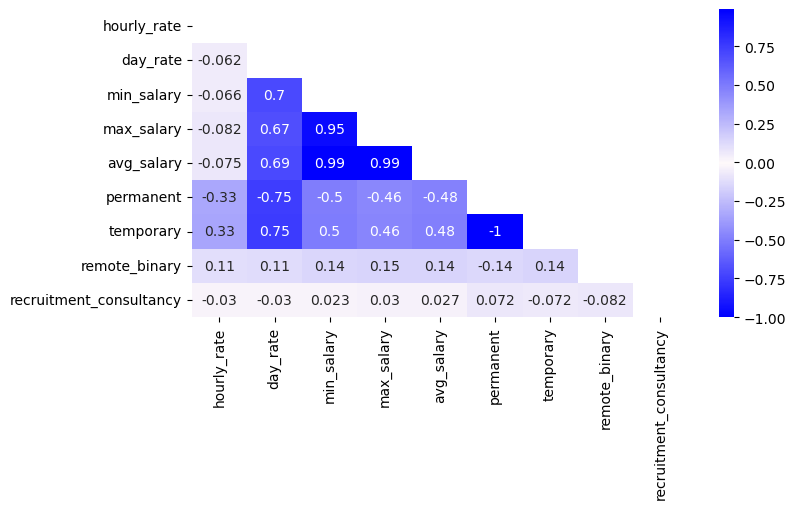

In [332]:
# create heatmap to visualise correlations
from matplotlib.colors import LinearSegmentedColormap

plt.figure(figsize = (8, 4))
cmap = LinearSegmentedColormap.from_list('', ['blue', 'snow', 'blue'])
sns.heatmap(df.corr(),cmap=cmap,annot=True,mask=np.triu(df.corr()))

plt.show()

#### Univariate Analysis

##### Explore Continuous Columns

In [333]:
# create a df for continuous columns analysis
df_con = df[['min_salary','max_salary','avg_salary']]
df_con.head()

,min_salary,max_salary,avg_salary
0,30000,30000,30000
1,50000,65000,57500
2,40000,70000,55000
3,40000,50000,45000
4,117000,130000,123500


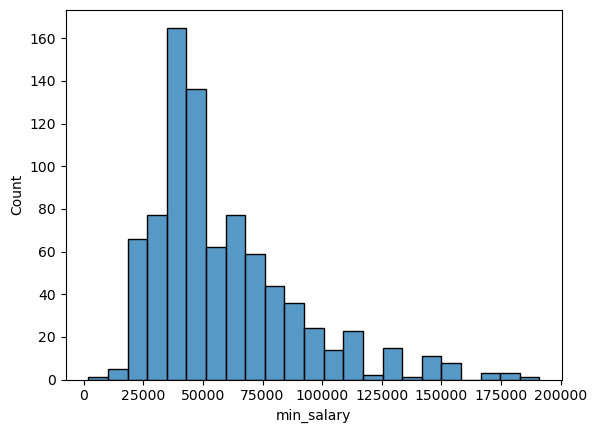

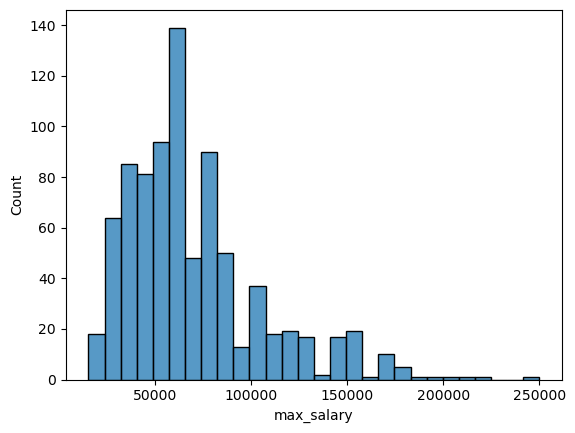

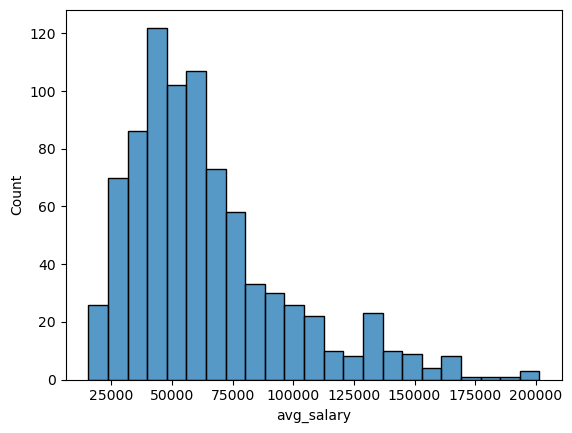

In [334]:
# create a histplot for all numerical columns
for column in df_con:
    sns.histplot(data=df, x=column)
    plt.show()

##### Explore Categorical Columns

In [335]:
# create a df for the categorical columns analysis
df_cat = df[['title_simplified','seniority','city','permanent','temporary','remote_binary','recruitment_consultancy','hourly_rate','day_rate','avg_salary']].copy()
df_cat.head()

,title_simplified,seniority,city,permanent,temporary,remote_binary,recruitment_consultancy,hourly_rate,day_rate,avg_salary
0,data scientist,other,other cities,1,0,0,0,0,0,30000
1,data scientist,other,other cities,1,0,0,0,0,0,57500
2,data scientist,other,london,1,0,0,0,0,0,55000
3,data scientist,other,other cities,1,0,0,0,0,0,45000
4,data scientist,other,other cities,0,1,0,0,0,1,123500


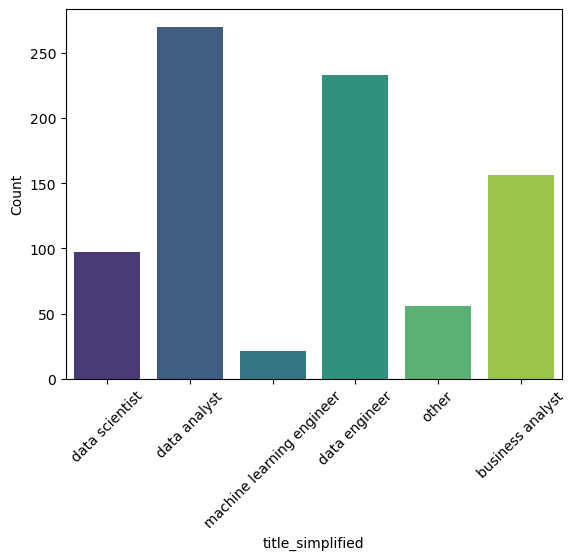

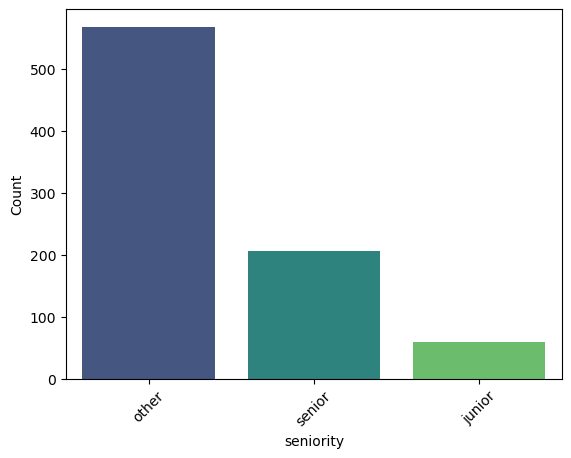

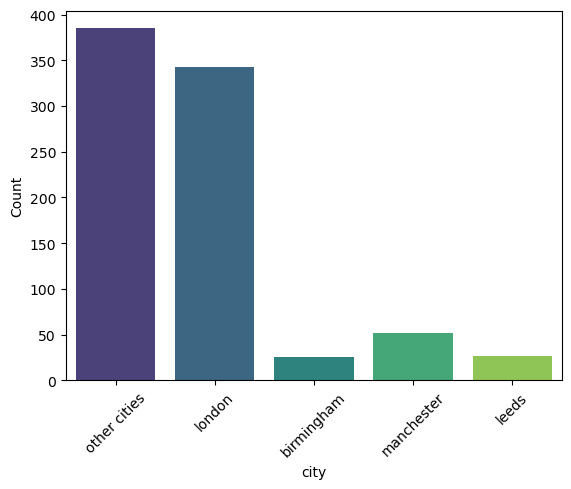

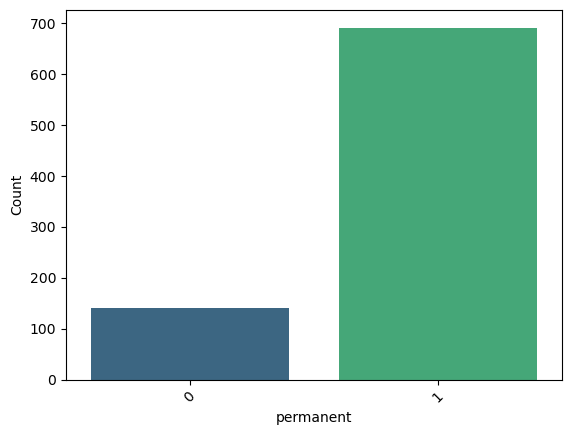

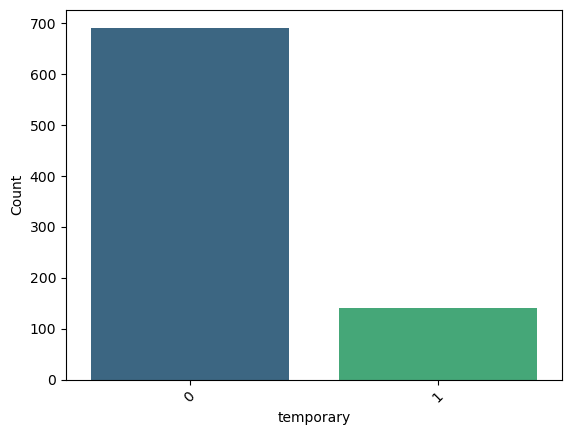

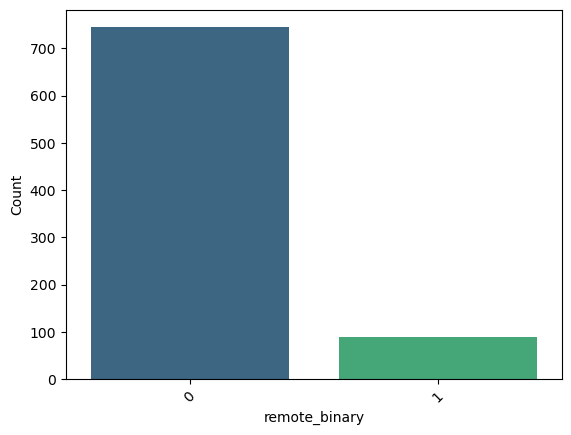

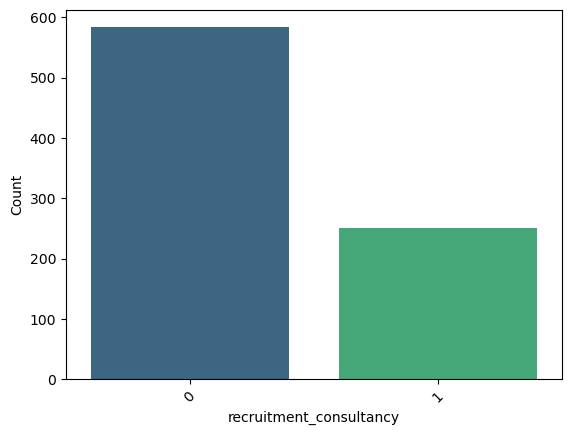

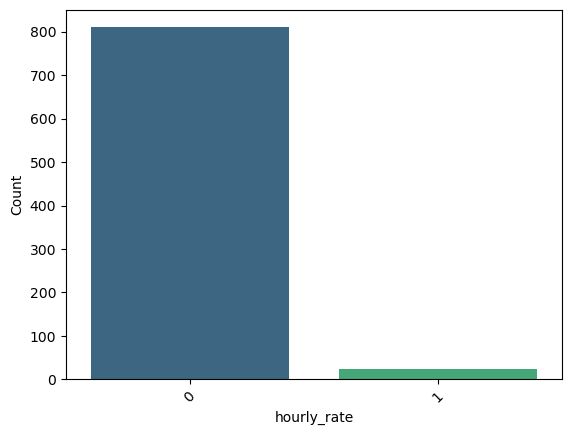

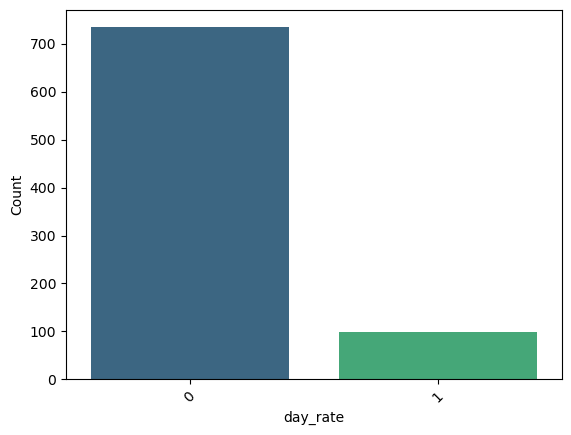

In [336]:
# create countplots for all categorical columns
for column in df_cat.columns[:-1]:

    sns.countplot(x=column, data=df_cat, palette='viridis')

    plt.xlabel(column)
    plt.ylabel('Count')

    plt.xticks(rotation=45)

    plt.show()

#### Bitvariate Analysis

##### Continuous Data vs Target

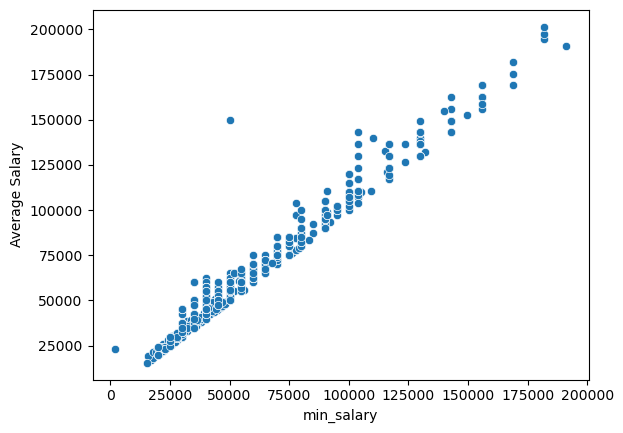

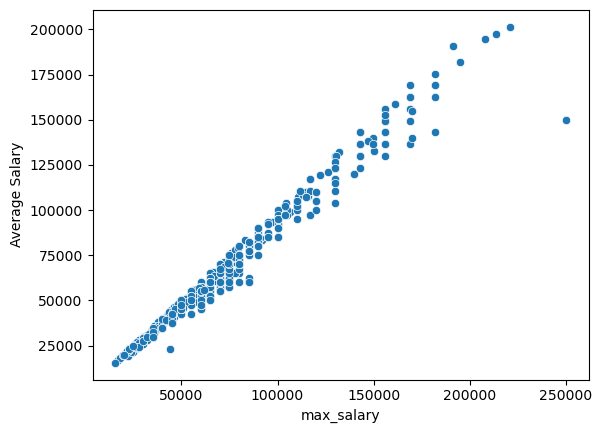

In [337]:
# create scatterplots for all continuous columns against the target
for column in df_con.columns[:-1]:

    sns.scatterplot(x=column, y='avg_salary', data=df_con)

    plt.xlabel(column)
    plt.ylabel('Average Salary')

    plt.show()

In [338]:
# investigate outlier
df[(df.min_salary == 50000)&(df.avg_salary == 150000)]

,title,company,location,contract,remote,salary,hourly_rate,day_rate,min_salary,max_salary,avg_salary,city,title_simplified,seniority,permanent,temporary,remote_binary,recruitment_consultancy
787,equity quantitative research software engineer,huxley,london,"permanent, full-time",no,"£50,000 - £250,000 per annum",0,0,50000,250000,150000,london,other,other,1,0,0,0


##### Categorical Data vs Target

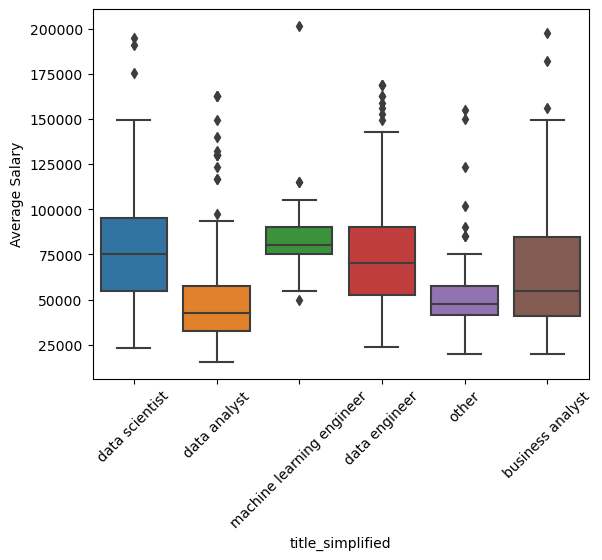

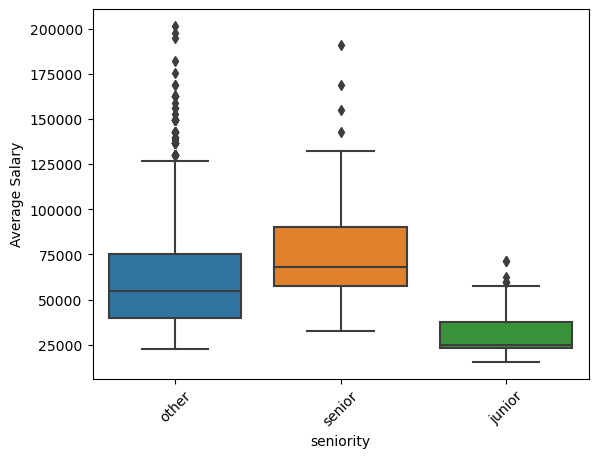

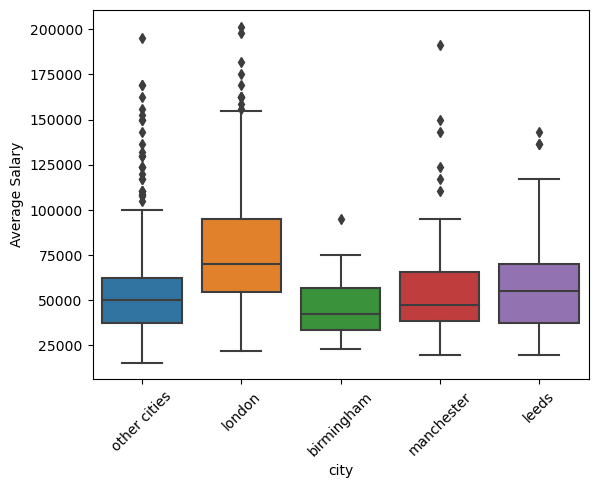

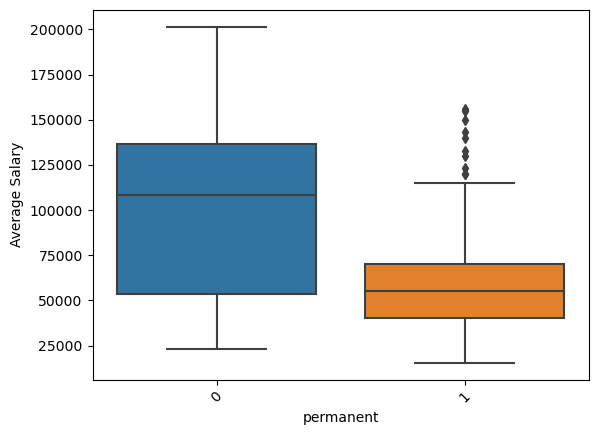

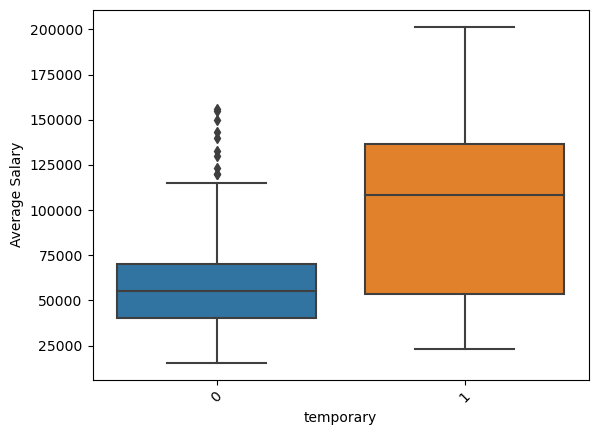

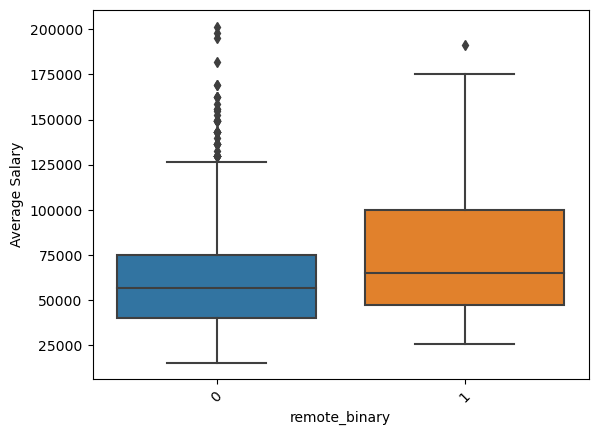

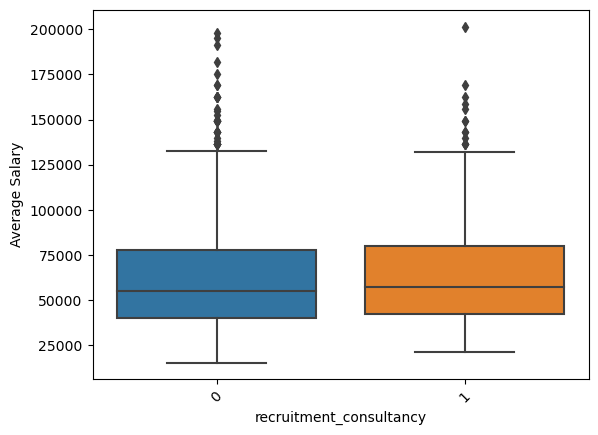

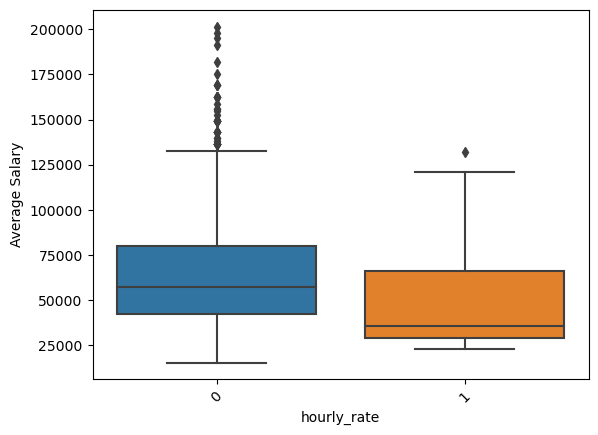

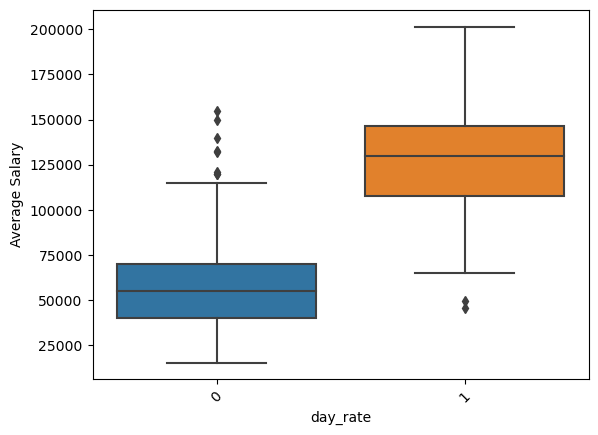

In [339]:
# create box plots for all categorical columns against target column
for column in df_cat.columns[:-1]:

    sns.boxplot(x=column, y='avg_salary', data=df_cat)

    plt.xlabel(column)
    plt.ylabel('Average Salary')

    plt.xticks(rotation=45)

    plt.show()

#### Multivariate Analysis

##### Title vs City

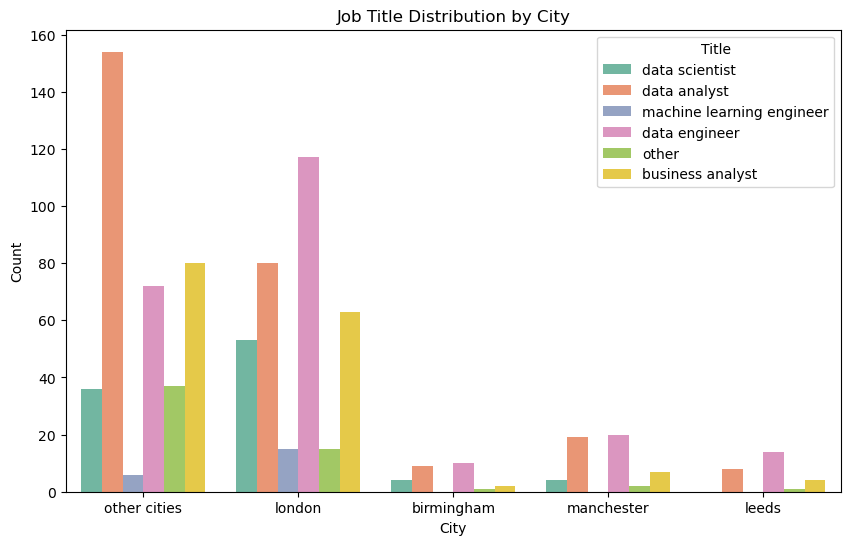

In [340]:
# create a count plot to visualise job title distribution by city
plt.figure(figsize=(10, 6))  
sns.countplot(x='city', hue='title_simplified', data=df, palette='Set2')

plt.xlabel('City')
plt.ylabel('Count')
plt.title('Job Title Distribution by City')

plt.legend(title='Title', loc='upper right')

plt.show()

In [341]:
# create a cross-table for title vs city
cross_tab = pd.crosstab(df['city'], df['title_simplified'])
cross_tab

title_simplified,business analyst,data analyst,data engineer,data scientist,machine learning engineer,other
city,,,,,,
birmingham,2,9,10,4,0,1
leeds,4,8,14,0,0,1
london,63,80,117,53,15,15
manchester,7,19,20,4,0,2
other cities,80,154,72,36,6,37


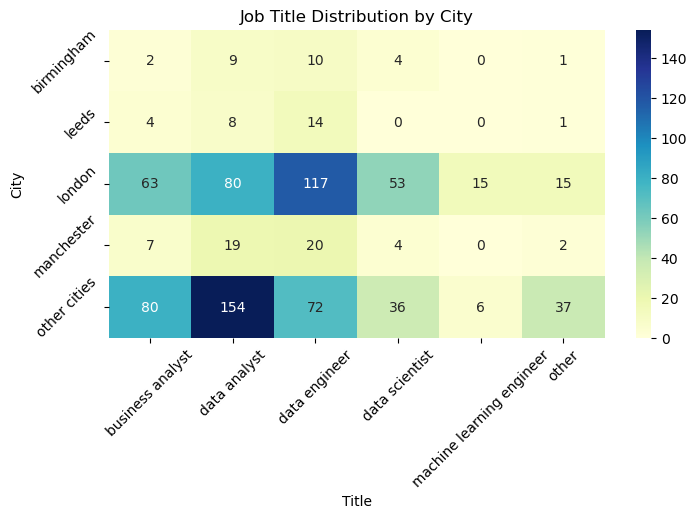

In [342]:
# create a heatmap to visualise cross table above
plt.figure(figsize=(8, 4))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')  # 'annot' adds count values, 'fmt' formats the counts

plt.xlabel('Title')
plt.ylabel('City')
plt.title('Job Title Distribution by City')

plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()

In [343]:
# create pivot table for mean avg_salary across title vs city
pivot_tab = df.pivot_table(
    'avg_salary', 
    index = 'city', 
    columns='title_simplified'
)
pivot_tab

title_simplified,business analyst,data analyst,data engineer,data scientist,machine learning engineer,other
city,,,,,,
birmingham,31240.500000,35444.444444,58500.000000,52500.000000,NaN,40000.000000
leeds,46209.500000,42562.500000,78285.714286,NaN,NaN,61000.000000
london,82933.476190,62272.900000,79751.965812,83919.566038,93433.333333,79236.666667
manchester,74476.857143,44157.894737,61650.000000,90900.000000,NaN,46250.000000
other cities,59469.350000,43264.759740,70833.333333,69395.722222,74166.666667,44867.810811


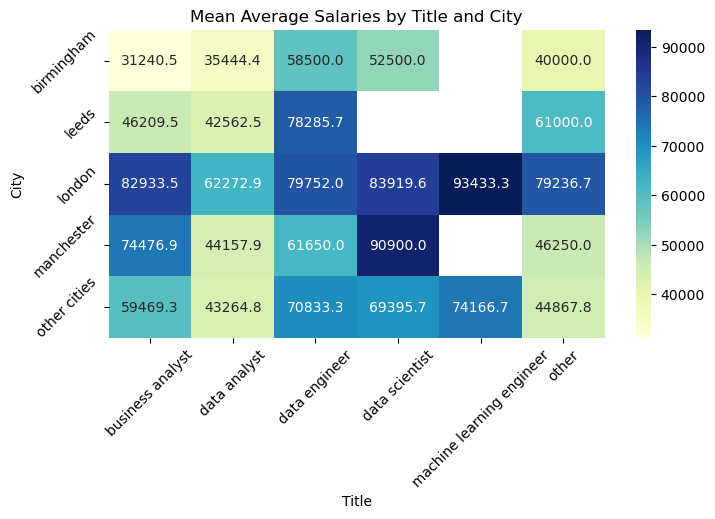

In [344]:
# create a heatmap to visualise pivot table above
plt.figure(figsize=(8, 4))  
sns.heatmap(pivot_tab, annot=True, fmt=".1f", cmap="YlGnBu")

plt.xlabel('Title')
plt.ylabel('City')
plt.title('Mean Average Salaries by Title and City')

plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()

##### Title vs Remote (work from home)

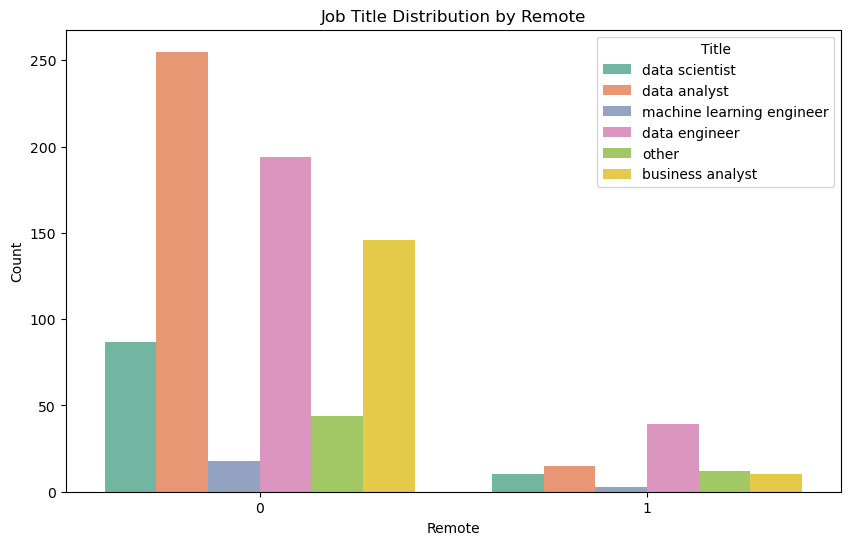

In [345]:
# create a count plot to visualise job title distribution by remote
plt.figure(figsize=(10, 6))  
sns.countplot(x='remote_binary', hue='title_simplified', data=df, palette='Set2')

plt.xlabel('Remote')
plt.ylabel('Count')
plt.title('Job Title Distribution by Remote')

plt.legend(title='Title', loc='upper right')

plt.show()

In [346]:
# create a cross-table for title vs remote
cross_tab = pd.crosstab(df['remote_binary'], df['title_simplified'])
cross_tab

title_simplified,business analyst,data analyst,data engineer,data scientist,machine learning engineer,other
remote_binary,,,,,,
0,146,255,194,87,18,44
1,10,15,39,10,3,12


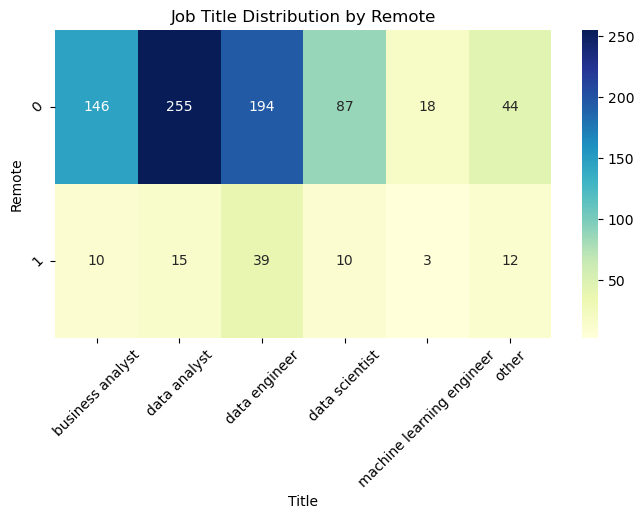

In [347]:
# create a heatmap to visualise cross table above
plt.figure(figsize=(8, 4))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')  # 'annot' adds count values, 'fmt' formats the counts

plt.xlabel('Title')
plt.ylabel('Remote')
plt.title('Job Title Distribution by Remote')

plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()

In [348]:
# create pivot table for mean avg_salary across title vs city
pivot_tab = df.pivot_table(
    'avg_salary', 
    index = 'remote_binary', 
    columns='title_simplified'
)
pivot_tab

title_simplified,business analyst,data analyst,data engineer,data scientist,machine learning engineer,other
remote_binary,,,,,,
0,67794.958904,47918.282353,72592.010309,73384.862069,92166.666667,55475.204545
1,85295.000000,61596.200000,83644.358974,113510.000000,62500.000000,50104.166667


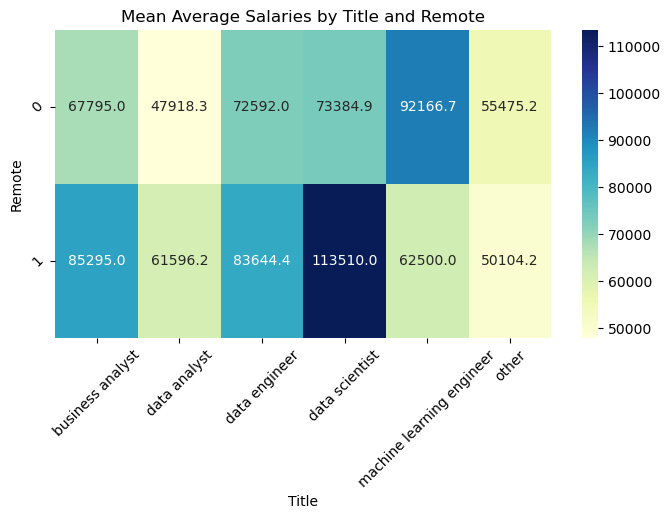

In [349]:
# create a heatmap to visualise pivot table above
plt.figure(figsize=(8, 4))  
sns.heatmap(pivot_tab, annot=True, fmt=".1f", cmap="YlGnBu")

plt.xlabel('Title')
plt.ylabel('Remote')
plt.title('Mean Average Salaries by Title and Remote')

plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()

##### Title vs Recruitment Consultancy (Y/N)

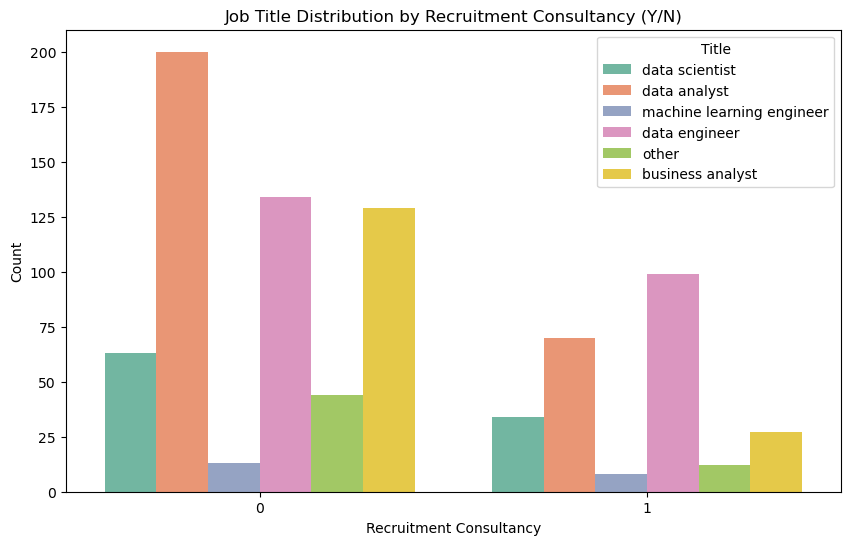

In [350]:
# create a count plot to visualise job title distribution by remote
plt.figure(figsize=(10, 6))  
sns.countplot(x='recruitment_consultancy', hue='title_simplified', data=df, palette='Set2')

plt.xlabel('Recruitment Consultancy')
plt.ylabel('Count')
plt.title('Job Title Distribution by Recruitment Consultancy (Y/N)')

plt.legend(title='Title', loc='upper right')

plt.show()

In [351]:
# create a cross-table for title vs remote
cross_tab = pd.crosstab(df['recruitment_consultancy'], df['title_simplified'])
cross_tab

title_simplified,business analyst,data analyst,data engineer,data scientist,machine learning engineer,other
recruitment_consultancy,,,,,,
0,129,200,134,63,13,44
1,27,70,99,34,8,12


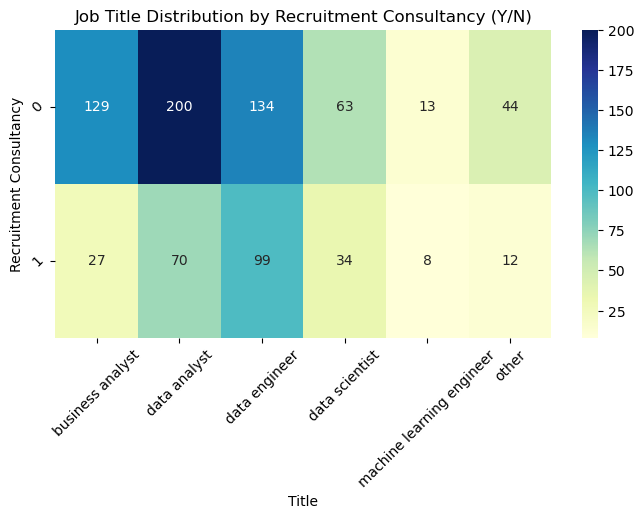

In [352]:
# create a heatmap to visulaise the cross table above
plt.figure(figsize=(8, 4))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')  # 'annot' adds count values, 'fmt' formats the counts

plt.xlabel('Title')
plt.ylabel('Recruitment Consultancy')
plt.title('Job Title Distribution by Recruitment Consultancy (Y/N)')

plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()

In [375]:
# create pivot table for mean avg_salary across title vs recruitment consultancy
pivot_tab = df.pivot_table(
    'avg_salary', 
    index = 'recruitment_consultancy', 
    columns='title_simplified'
)
pivot_tab

title_simplified,business analyst,data analyst,data engineer,data scientist,machine learning engineer,other
recruitment_consultancy,,,,,,
0,68256.976744,50377.550000,75380.447761,76993.380952,82307.692308,52252.477273
1,72069.037037,43822.785714,73171.717172,78500.000000,97062.500000,61920.833333


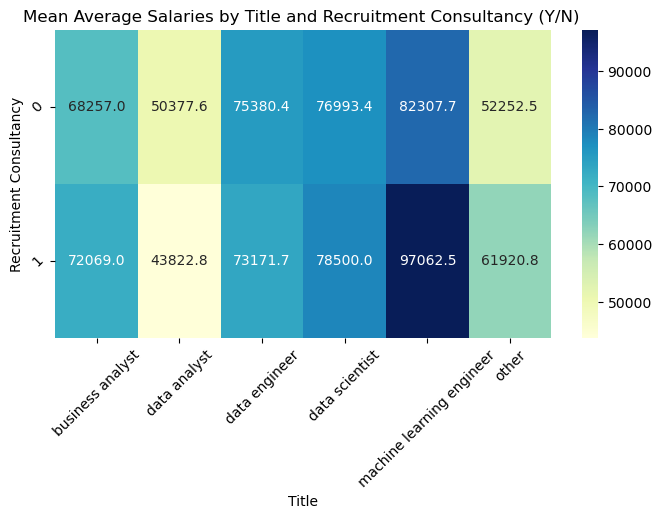

In [376]:
# create a heatmap to visualise pivot table above
plt.figure(figsize=(8, 4))  
sns.heatmap(pivot_tab, annot=True, fmt=".1f", cmap="YlGnBu")

plt.xlabel('Title')
plt.ylabel('Recruitment Consultancy')
plt.title('Mean Average Salaries by Title and Recruitment Consultancy (Y/N) ')

plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()

##### Title vs Contract Type

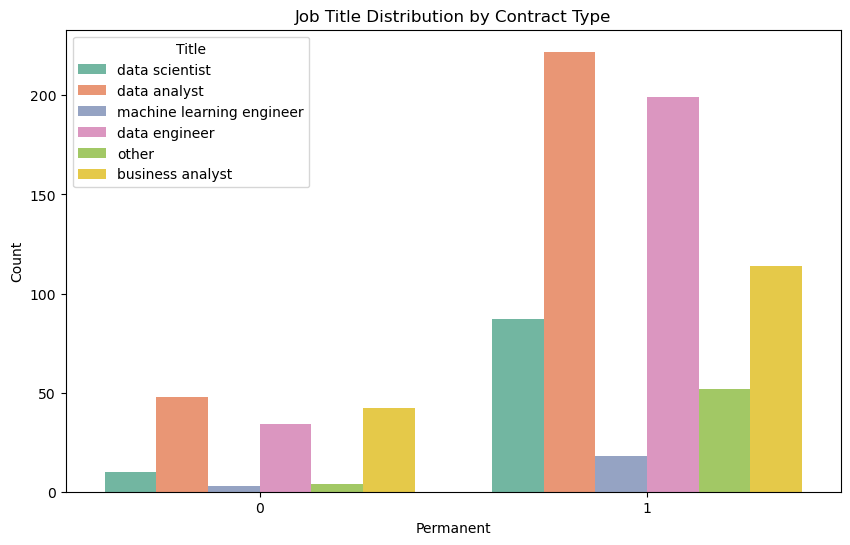

In [353]:
# create a count plot to visualise job title distribution by city
plt.figure(figsize=(10, 6))  
sns.countplot(x='permanent', hue='title_simplified', data=df, palette='Set2')

plt.xlabel('Permanent')
plt.ylabel('Count')
plt.title('Job Title Distribution by Contract Type')

plt.legend(title='Title', loc='upper left')

plt.show()

In [354]:
# create a cross-table for title vs remote
cross_tab = pd.crosstab(df['permanent'], df['title_simplified'])
cross_tab

title_simplified,business analyst,data analyst,data engineer,data scientist,machine learning engineer,other
permanent,,,,,,
0,42,48,34,10,3,4
1,114,222,199,87,18,52


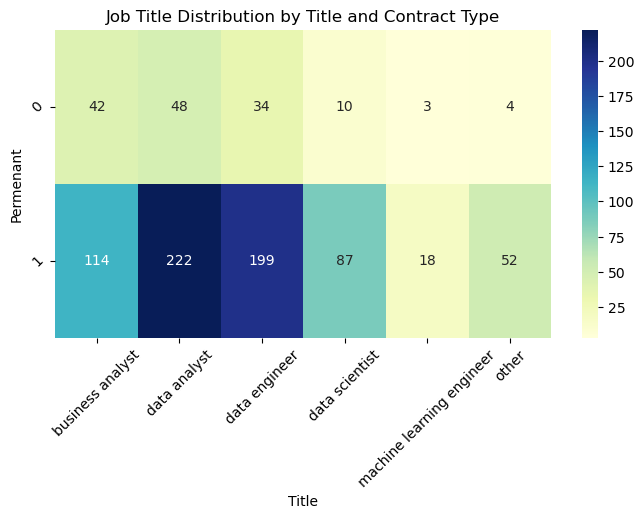

In [355]:
# create a heatmap to visualise the cross table above
plt.figure(figsize=(8, 4))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')  # 'annot' adds count values, 'fmt' formats the counts

plt.xlabel('Title')
plt.ylabel('Permenant')
plt.title('Job Title Distribution by Title and Contract Type')

plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()

In [356]:
# create pivot table for mean avg_salary across title vs city
pivot_tab = df.pivot_table(
    'avg_salary', 
    index = 'permanent', 
    columns='title_simplified'
)
pivot_tab

title_simplified,business analyst,data analyst,data engineer,data scientist,machine learning engineer,other
permanent,,,,,,
0,112776.404762,68251.437500,123227.352941,119690.000000,118000.000000,80637.500000
1,52757.938596,44446.108108,66106.783920,72674.517241,82916.666667,52300.173077


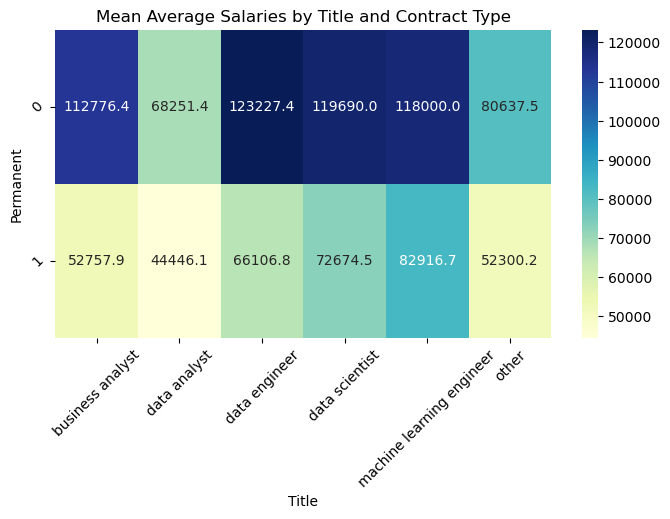

In [357]:
# create a heatmap to visualise pivot table above
plt.figure(figsize=(8, 4))  
sns.heatmap(pivot_tab, annot=True, fmt=".1f", cmap="YlGnBu")

plt.xlabel('Title')
plt.ylabel('Permanent')
plt.title('Mean Average Salaries by Title and Contract Type')

plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()

##### Title vs Seniority

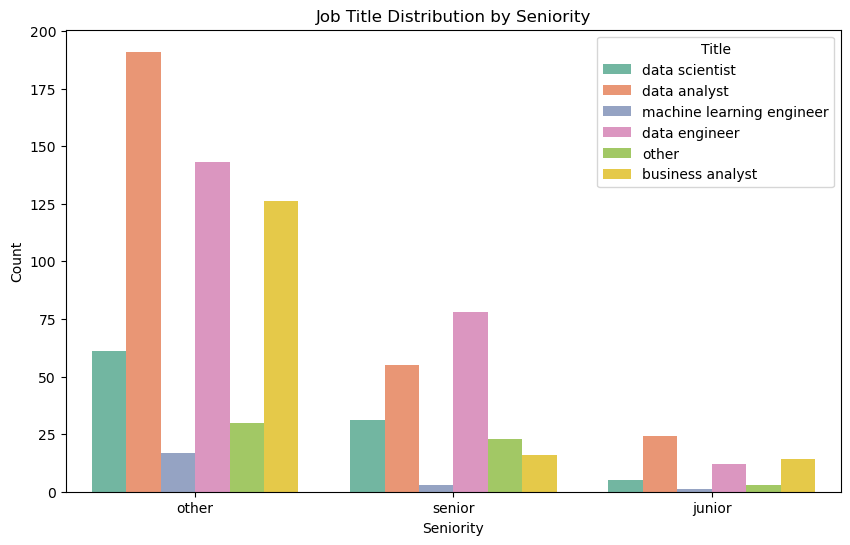

In [358]:
# create a count plot to visualise job title distribution by city
plt.figure(figsize=(10, 6))  
sns.countplot(x='seniority', hue='title_simplified', data=df, palette='Set2')

plt.xlabel('Seniority')
plt.ylabel('Count')
plt.title('Job Title Distribution by Seniority')

plt.legend(title='Title', loc='upper right')

plt.show()

In [359]:
# create cross-table for title vs seniority
cross_tab = pd.crosstab(df['seniority'], df['title_simplified'])
cross_tab

title_simplified,business analyst,data analyst,data engineer,data scientist,machine learning engineer,other
seniority,,,,,,
junior,14,24,12,5,1,3
other,126,191,143,61,17,30
senior,16,55,78,31,3,23


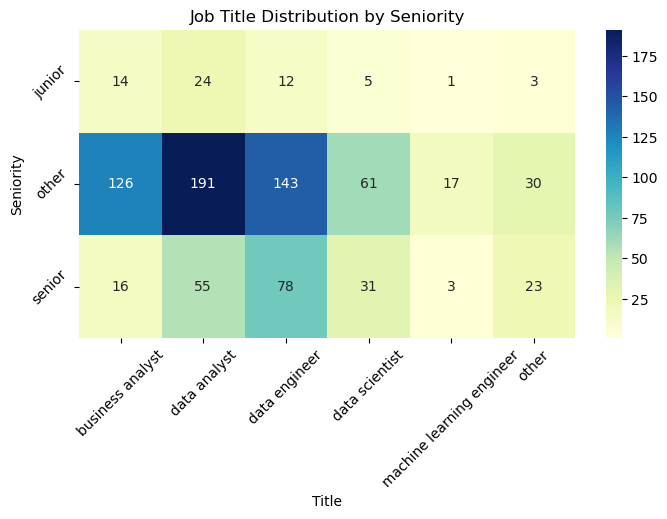

In [360]:
# create a heatmap to visualise the cross table above
plt.figure(figsize=(8, 4))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')  # 'annot' adds count values, 'fmt' formats the counts

plt.xlabel('Title')
plt.ylabel('Seniority')
plt.title('Job Title Distribution by Seniority')

plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()

In [361]:
# create pivot table for mean avg_salary across title vs seniority
pivot_tab = df.pivot_table(
    'avg_salary',
    index='seniority',
    columns='title_simplified'
)
pivot_tab

title_simplified,business analyst,data analyst,data engineer,data scientist,machine learning engineer,other
seniority,,,,,,
junior,26280.357143,26754.375000,34291.666667,55100.000000,57500.000000,35166.666667
other,71793.325397,48627.942408,73985.874126,74243.377049,88764.705882,55215.133333
senior,83570.625000,58419.327273,81455.128205,87588.290323,93333.333333,55661.086957


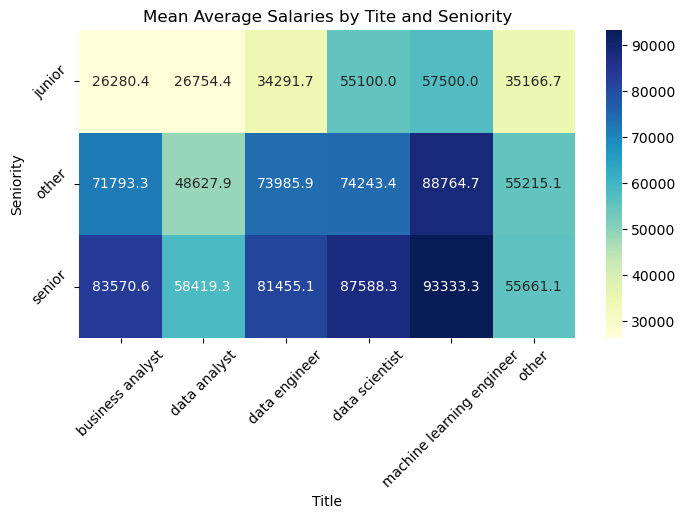

In [362]:
# create a heatmap to visualise pivot table above
plt.figure(figsize=(8, 4))  
sns.heatmap(pivot_tab, annot=True, fmt=".1f", cmap="YlGnBu")

plt.xlabel('Title')
plt.ylabel('Seniority')
plt.title('Mean Average Salaries by Tite and Seniority')

plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()

##### Temporary Contract vs Day Rate

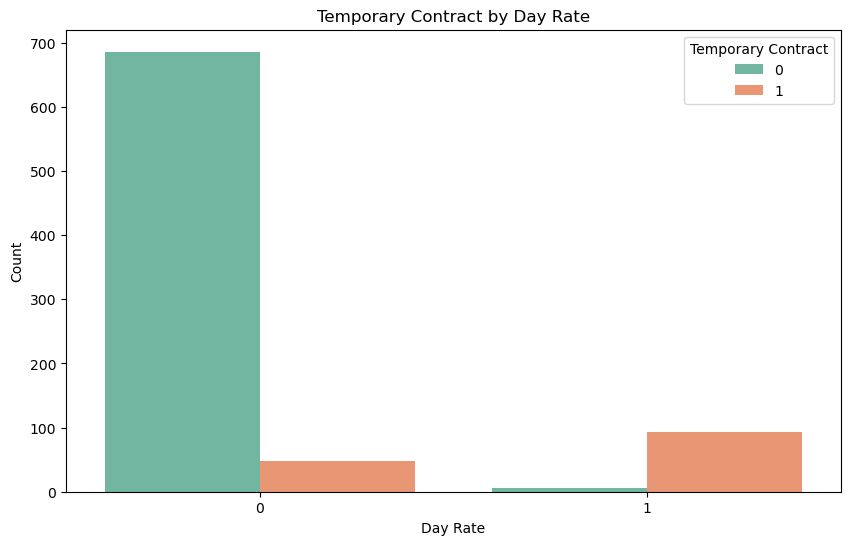

In [363]:
# create a count plot to visualise temp contract distribution by day rate
plt.figure(figsize=(10, 6))  
sns.countplot(x='day_rate', hue='temporary', data=df, palette='Set2')

plt.xlabel('Day Rate')
plt.ylabel('Count')
plt.title('Temporary Contract by Day Rate')

plt.legend(title='Temporary Contract', loc='upper right')

plt.show()

In [364]:
# create cross-table for temp contract vs day rate
cross_tab = pd.crosstab(df['day_rate'], df['temporary'])
cross_tab

temporary,0,1
day_rate,,
0,686,48
1,6,93


In [365]:
# check how many temp contracts on hourly rates
df[(df.temporary==1)&(df.hourly_rate==1)]['temporary'].count()

21

In [366]:
# check how many temp contracts on annual salaries
df[(df.temporary==1)&(df.day_rate==0)&(df.hourly_rate==0)]['temporary'].count()

27

In [367]:
# create pivot table for mean avg_salary across temporary contract vs day rate
pivot_tab = df.pivot_table(
    'avg_salary',
    index = 'day_rate',
    columns='temporary'
)
pivot_tab

temporary,0,1
day_rate,,
0,56623.153061,46618.083333
1,121333.333333,127292.365591


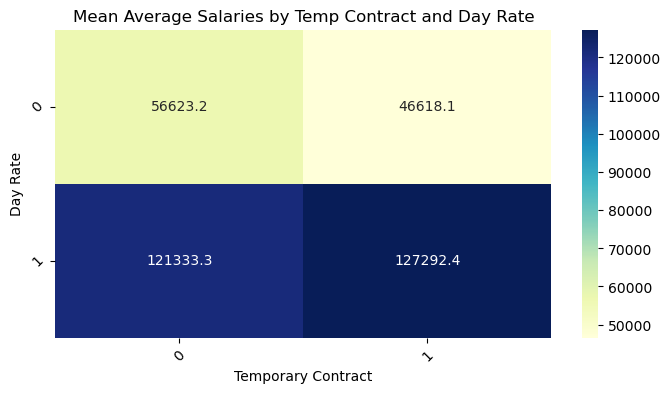

In [368]:
# create a heatmap to visualise pivot table above
plt.figure(figsize=(8, 4))  
sns.heatmap(pivot_tab, annot=True, fmt=".1f", cmap="YlGnBu")

plt.xlabel('Temporary Contract')
plt.ylabel('Day Rate')
plt.title('Mean Average Salaries by Temp Contract and Day Rate')

plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()

In [369]:
# check permanent contracts on day rate
df[(df.temporary==0)&(df.day_rate==1)&(df.hourly_rate==0)]

,title,company,location,contract,remote,salary,hourly_rate,day_rate,min_salary,max_salary,avg_salary,city,title_simplified,seniority,permanent,temporary,remote_binary,recruitment_consultancy
125,business analyst - contract,searchability,gloucester,"permanent, full-time",no,£600 per day,0,1,156000,156000,156000,other cities,business analyst,other,1,0,0,0
385,data analyst - remote - £500 per day - 6 month...,involved solutions,london,"permanent, full-time",work from home,£450 - £550 per day,0,1,117000,143000,130000,london,data analyst,other,1,0,1,0
393,"business analyst, data migration, sharepoint",arc it recruitment,city of london,"permanent, full-time",no,£550 per day,0,1,143000,143000,143000,london,business analyst,other,1,0,0,1
522,business analyst,hays specialist recruitment limited,cheshire,"permanent, full-time",no,£450 - £500 per day,0,1,117000,130000,123500,other cities,business analyst,other,1,0,0,1
552,contract business analyst,gem partnership ltd,durham,"permanent, full-time",no,£200 - £300 per day,0,1,52000,78000,65000,other cities,business analyst,other,1,0,0,0
646,data engineer,rutherford briant,hoddesdon,"permanent, full-time",no,£350 - £500 per day,0,1,91000,130000,110500,other cities,data engineer,other,1,0,0,0


##### Seniority vs Remote (work from home)

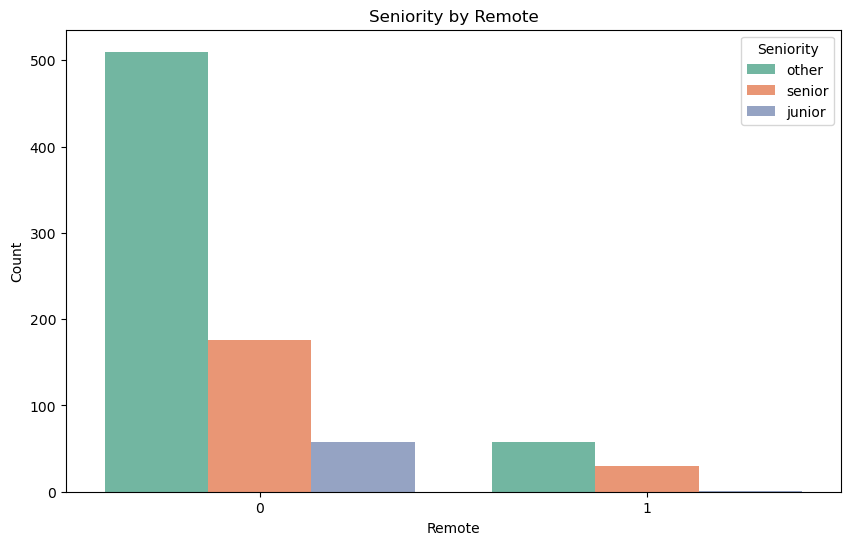

In [370]:
# create a count plot to visualise temp contract distribution by day rate
plt.figure(figsize=(10, 6))  
sns.countplot(x='remote_binary', hue='seniority', data=df, palette='Set2')

plt.xlabel('Remote')
plt.ylabel('Count')
plt.title('Seniority by Remote')

plt.legend(title='Seniority', loc='upper right')

plt.show()

In [371]:
# create cross-table for seniority vs remote
cross_tab = pd.crosstab(df['remote_binary'], df['seniority'])
cross_tab

seniority,junior,other,senior
remote_binary,,,
0,58,510,176
1,1,58,30


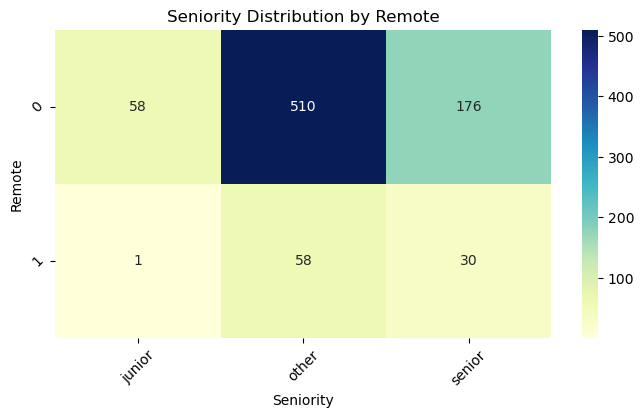

In [372]:
# create a heatmap to visualise the cross table above
plt.figure(figsize=(8, 4))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')  # 'annot' adds count values, 'fmt' formats the counts

plt.xlabel('Seniority')
plt.ylabel('Remote')
plt.title('Seniority Distribution by Remote')

plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()

In [373]:
# create a pivot table for mean avg_salary across seniority vs remote
pivot_tab = df.pivot_table(
    'avg_salary',
    index = 'remote_binary',
    columns='seniority'
)
pivot_tab

seniority,junior,other,senior
remote_binary,,,
0,31078.103448,62971.868627,72535.710227
1,57500.000000,77457.293103,80428.333333


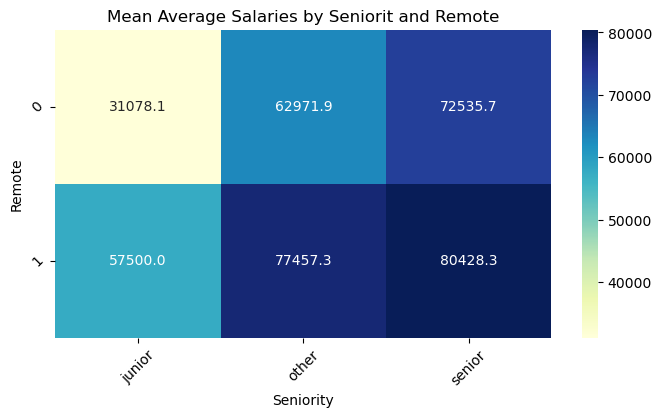

In [374]:
# create a heatmap to visualise pivot table above
plt.figure(figsize=(8, 4))  
sns.heatmap(pivot_tab, annot=True, fmt=".1f", cmap="YlGnBu")

plt.xlabel('Seniority')
plt.ylabel('Remote')
plt.title('Mean Average Salaries by Seniorit and Remote')

plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()

In [378]:
# save cleaned data frame to csv file
df.to_csv('reed_data_eda.csv', index=False)